### A Map and Plot of the Coordinates of Segmenting and Clustering Neighborhoods in Toronto

In [42]:
#importing the libraries
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup
import json
import requests

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as color

from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium

In [19]:
source = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [20]:
text_results = requests.get(source).text

In [21]:
html_parsered_result = BeautifulSoup(text_results, 'html.parser')

In [22]:
neighbourhood_info_table = html_parsered_result.find('table', class_ = 'wikitable')
neighbourhood_rows = neighbourhood_info_table.find_all('tr')
neighbourhood_info = []
for row in neighbourhood_rows:
    info = row.text.split('\n')[1:-1] 
    neighbourhood_info.append(info)

In [23]:
neighbourhood_info[0][-1] = 'Neighborhood' 
dataframe = pd.DataFrame(neighbourhood_info[1:], columns=neighbourhood_info[0])
not_assigned_boroughs = dataframe.index[dataframe['Borough'] == 'Not assigned']
dataframe.drop(dataframe.index[not_assigned_boroughs], inplace=True)
dataframe.reset_index(drop=True, inplace=True)

In [24]:
group = dataframe.groupby('Postcode')
grouped_neighbour = group['Neighborhood'].apply(lambda x: "%s" % ', '.join(x))
grouped_boroughs = group['Borough'].apply(lambda x: set(x).pop())
grouped_dataframe = pd.DataFrame(list(zip(grouped_boroughs.index, grouped_boroughs, grouped_neighbour)))
grouped_dataframe.columns = ['Postcode', 'Borough', 'Neighborhood']


In [25]:
coordinates_df = 'http://cocl.us/Geospatial_data'
dataframe=pd.read_csv(coordinates_df)

In [26]:
postcode_coordinates_df = grouped_dataframe.join(dataframe.set_index('Postal Code'), on='Postcode')

With the coordinates of each postal code, a map of Toronto with markers of the Postcode position is shown.

In [34]:
map = folium.Map(location=[43.6532,-79.3832], zoom_start=7)

for location in postcode_coordinates_df.itertuples(): 
    label = 'Postal Code: {};  Borough: {};  Neighborhoods: {}'.format(location[1], location[2], location[3])
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [location[-2], location[-1]],
        radius=1,
        color='saffron',
        fill=True,
        fill_color='#ff9933',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 
    folium.Circle(
        radius=340,
        popup=label,
        location=[location[-2], location[-1]],
        color='#ff9933',
        fill=True,
        fill_color='#ff9933'
    ).add_to(map) 
    
map

The map shows that the Postal codes, and the area cover by some of them, using a radius of 340 meters overlaps.

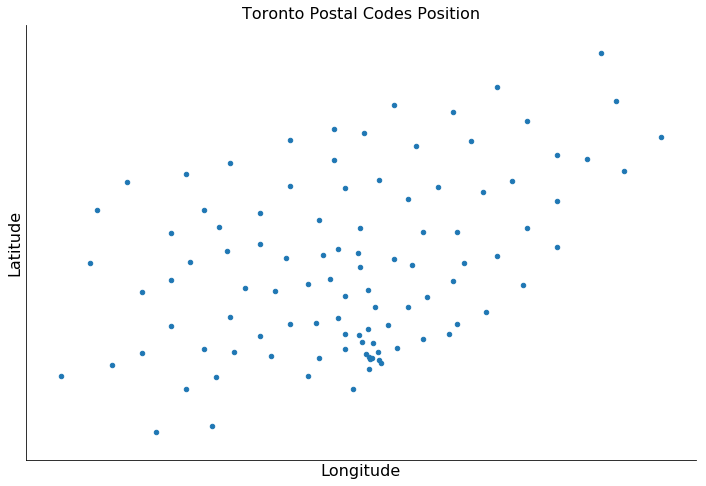

In [40]:
import matplotlib.pyplot as plt

X = postcode_coordinates_df[['Longitude', 'Latitude']]

scatter_plot = X.plot.scatter(x='Longitude', 
               y='Latitude',  
               fontsize = 18,
               figsize=(12, 8))

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
scatter_plot.set_title('Toronto Postal Codes Position', fontsize=16)

scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()